<a href="https://colab.research.google.com/github/VanshikaM03/multi-threading/blob/main/Multi_threading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment-** Multiply 100 random matrices of size 1k x 1k with a
constant matrix of size 1k x 1k and generate the result
table, graph and CPU usages.

In [3]:
import os
print ("OS Type: ", os.name)

OS Type:  posix


In [4]:
import sys
print ("OS Name: ", sys.platform)

OS Name:  linux


In [5]:
import platform
print ("OS Platform: ", platform.platform())

OS Platform:  Linux-6.1.58+-x86_64-with-glibc2.35


In [6]:
import multiprocessing
numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

Num of cores are:  2


In [7]:
import threading
activeThread = threading.activeCount()
print ("Num of threads: ",activeThread)

Num of threads:  6


<ipython-input-7-d3406fc2f7e9>:2: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  activeThread = threading.activeCount()


In [8]:
import time
startTime = time.time()
n = 5
print("Program Started")
print("\nWaiting for %d sec...." % (n))
time.sleep(n)
print("\nTotal Time %f sec" % (round( time.time() - startTime,4)))

Program Started

Waiting for 5 sec....

Total Time 5.001000 sec


In [9]:
import os
os.getcwd()

'/content'

<ipython-input-13-4fc77e40a214>:27: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  activeThreads = threading.activeCount()
<ipython-input-13-4fc77e40a214>:45: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  if threading.activeCount() - activeThreads + 1 <= numberOfThreads:


Program Started....
Multiplying matrix 1
Multiplying matrix 2
Multiplying matrix 3
Multiplying matrix 4
Multiplying matrix 5
Multiplying matrix 6
Multiplying matrix 7
Multiplying matrix 8
Multiplying matrix 9
Multiplying matrix 10
Multiplying matrix 11
Multiplying matrix 12
Multiplying matrix 13
Multiplying matrix 14
Multiplying matrix 15
Multiplying matrix 16
Multiplying matrix 17
Multiplying matrix 18
Multiplying matrix 19
Multiplying matrix 20
Multiplying matrix 21
Multiplying matrix 22
Multiplying matrix 23
Multiplying matrix 24
Multiplying matrix 25
Multiplying matrix 26
Multiplying matrix 27
Multiplying matrix 28
Multiplying matrix 29
Multiplying matrix 30
Multiplying matrix 31
Multiplying matrix 32
Multiplying matrix 33
Multiplying matrix 34
Multiplying matrix 35
Multiplying matrix 36
Multiplying matrix 37
Multiplying matrix 38
Multiplying matrix 39
Multiplying matrix 40
Multiplying matrix 41
Multiplying matrix 42
Multiplying matrix 43
Multiplying matrix 44
Multiplying matrix 45

<ipython-input-13-4fc77e40a214>:51: DeprecationWarning: activeCount() is deprecated, use active_count() instead
  if threading.activeCount() == activeThreads:


 All Thread ends

Thread	Time Taken
1	0.1375
2	0.2200
3	0.2950
4	0.3554
5	0.4101
6	0.1232
7	0.1821
8	0.2535
9	0.3318
10	0.3870
11	0.1446
12	0.2135
13	0.2666
14	0.3508
15	0.4137
16	0.1140
17	0.1644
18	0.2411
19	0.2974
20	0.3792
21	0.1158
22	0.1981
23	0.2634
24	0.3267
25	0.3846
26	0.1365
27	0.2135
28	0.2688
29	0.3301
30	0.3921
31	0.1159
32	0.1747
33	0.2480
34	0.3073
35	0.3668
36	0.1502
37	0.1978
38	0.2741
39	0.3313
40	0.3891
41	0.1130
42	0.1713
43	0.2384
44	0.3007
45	0.3553
46	0.1115
47	0.1713
48	0.2386
49	0.2980
50	0.3690
51	0.1957
52	0.3316
53	0.4492
54	0.5605
55	0.6797
56	0.2037
57	0.2999
58	0.3941
59	0.5230
60	0.6475
61	0.1108
62	0.1746
63	0.2369
64	0.2973
65	0.3676
66	0.1080
67	0.1739
68	0.2393
69	0.3017
70	0.3533
71	0.1045
72	0.1693
73	0.2356
74	0.2980
75	0.3565
76	0.1117
77	0.1683
78	0.2417
79	0.3022
80	0.3600
81	0.1150
82	0.1747
83	0.2461
84	0.3014
85	0.3573
86	0.1061
87	0.1731
88	0.2425
89	0.2989
90	0.3583
91	0.1127
92	0.1685
93	0.2429
94	0.3053
95	0.3603
96	0.1331
97	0.1939
98	

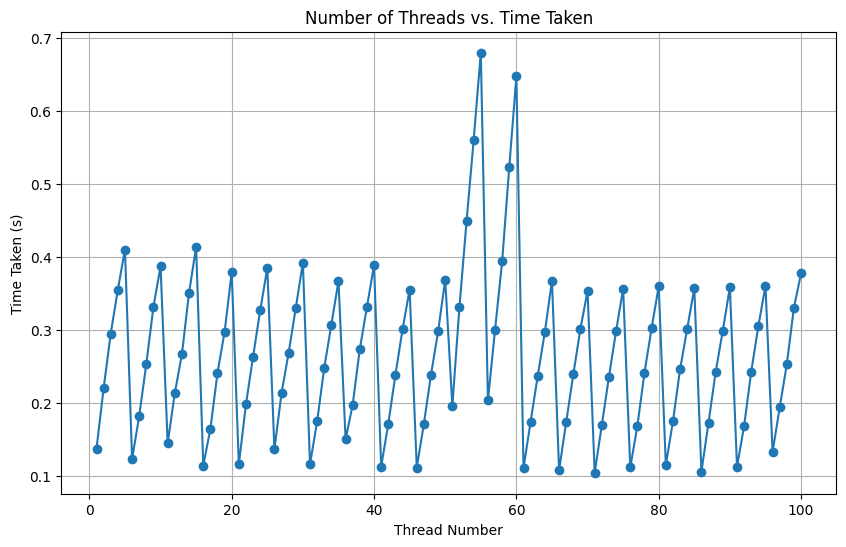

In [13]:
import numpy as np
import threading
import time
import matplotlib.pyplot as plt

# Parameters
matrix_size = 1000  # Size of the matrices (1k x 1k)
num_matrices = 100  # Number of matrices to multiply
constant_matrix = np.random.rand(matrix_size, matrix_size)  # Constant matrix for multiplication

# Function to multiply matrices
def multiply_matrices(matrix_index, start_times, end_times):
    start_time = time.time()
    matrix = np.random.rand(matrix_size, matrix_size)
    result_matrix = np.matmul(matrix, constant_matrix)
    end_time = time.time()

    start_times[matrix_index] = start_time
    end_times[matrix_index] = end_time

    return result_matrix, end_time - start_time

# Main program
startTime = time.time()

numberOfThreads = 5
activeThreads = threading.activeCount()

# Main Program - Run Multiple Threads
print("Program Started....")

results = []
start_times = [None] * num_matrices
end_times = [None] * num_matrices
time_taken = []

for i in range(num_matrices):
    cmd = i
    t = threading.Thread(target=multiply_matrices, args=(cmd, start_times, end_times))
    t.start()

    print("Multiplying matrix %d" % (i + 1))

    while True:
        if threading.activeCount() - activeThreads + 1 <= numberOfThreads:
            break
        time.sleep(1)

# Waiting to finish all Threads
while True:
    if threading.activeCount() == activeThreads:
        break
    else:
        print("    Thread still running (left %d)..." % (threading.activeCount() - activeThreads))
        time.sleep(1)

print(" All Thread ends")

# Create table of threads and time taken
table_data = []
for i in range(num_matrices):
    time_taken.append(end_times[i] - start_times[i])
    table_data.append([i + 1, end_times[i] - start_times[i]])

# Display table
print("\nThread\tTime Taken")
for row in table_data:
    print("%d\t%.4f" % (row[0], row[1]))

# Calculate and display total time taken
total_time = round(time.time() - startTime, 4)
print("\nTotal Time %f sec" % total_time)
print("Program Finished")

# Plot number of threads vs. time taken
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_matrices + 1), time_taken, marker='o')
plt.xlabel('Thread Number')
plt.ylabel('Time Taken (s)')
plt.title('Number of Threads vs. Time Taken')
plt.grid(True)
plt.show()


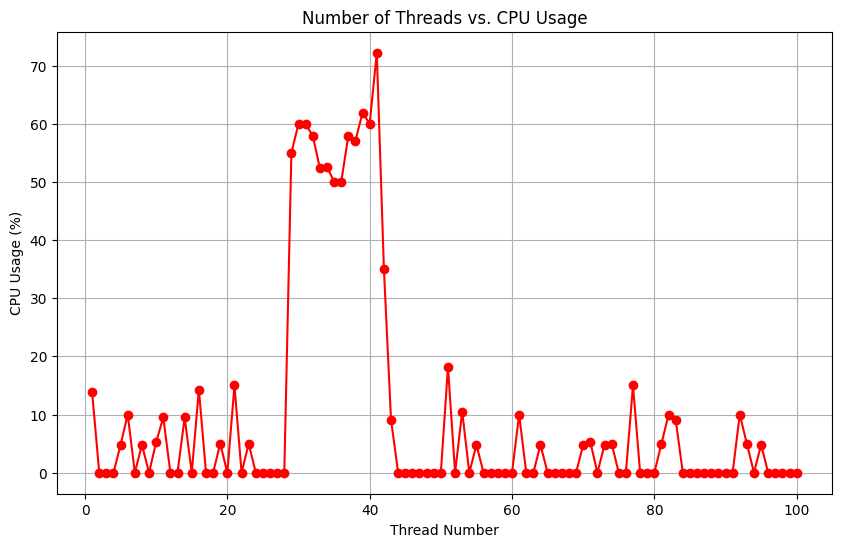

In [14]:
import matplotlib.pyplot as plt
import psutil

# Parameters
num_matrices = 100  # Number of matrices to multiply

# Initialize CPU usage data
cpu_usage = []

for i in range(num_matrices):
    # Simulate processing time
    time.sleep(0.1)

    # Get CPU usage
    cpu_usage.append(psutil.cpu_percent(interval=None))

# Plot CPU usage
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_matrices + 1), cpu_usage, marker='o', color='r')
plt.xlabel('Thread Number')
plt.ylabel('CPU Usage (%)')
plt.title('Number of Threads vs. CPU Usage')
plt.grid(True)
plt.show()
